# Введение в искусственные нейронные сети
# Урок 8. GAN
## Практическое задание к курсу

<ol>
    <li>Обучите нейронную сеть любой архитектуры которой не было на курсе, либо обучите нейронную сеть разобранной архитектуры, но на том датасете, которого не было на уроках. Сделайте анализ, того, что вам помогло в улучшения работы нейронной сети.   
    <ul>
       <li>вариант для 1) Обучите VAE на fashion_mnist  
       <li>вариант для 1) Обучите GAN на одном классе CIFAR</li>
    </ul>
    <li>Сделайте краткий обзор какой-нибудь научной работы посвященной тому или иному алгоритму нейронных сетей, который не рассматривался на курсе. Проведите анализ: Чем отличается выбранная вами на рассмотрение архитектура нейронной сети от других архитектур? В чем плюсы и минусы данной архитектуры? Какие могут возникнуть трудности при применении данной архитектуры на практике? 
    </li>
</ol>

## Генеративно-состязательная нейросеть (GAN).

Генеративно-состязательная нейросеть (Generative adversarial network, GAN) — архитектура, состоящая из генератора и дискриминатора, настроенных на работу друг против друга. Отсюда GAN и получила название генеративно-созтязательная. В случае работы с изображениями, во всем остальном — это сверточная нейронная сеть.

GAN были впервые представлены в работе 2014-го года Ian’a Goodfellow’a и других исследователей университета Монреаля, включая Yoshua Bengio. Директор Facebook по исследованиям искусственного интеллекта Yann LeCun назвал состязательную тренировку сетей “самой интересной идеей в машинном обучении за последние 10 лет”.

Вряд ли вы подумаете, что программиста можно назвать артистом, но, на самом деле, программирование это очень творческая профессия. Творчество, основанное на логике — John Romero

Потенциал GAN огромен, поскольку они имитируют любое распределение данных. GAN обучают создавать структуры, устрашающе похожие на сущности из нашего мира в области изображений, музыки, речи, прозы. Генеративно-состязательные сети, в некотором смысле, роботы-художники, и результат их работы впечатляет.

![image](progressivnye-GAN-ot-Nvidia.png)  
Реалистичные изображения несуществующих знаменитостей, созданные с помощью GAN

Рассмотрим, как работают алгоритмы дикриминатора и генератора.

### Дискриминатор

Дискриминационные алгоритмы пытаются классифицировать входные данные. Учитывая особенности полученных данных, они стараются определить категорию, к которой они относятся.

К примеру, пробегая все слова в письме дискриминационный алгоритм может предсказать, является сообщение спамом или не спамом. Спам — это категория, а пакет слов, собранный из электронной почты — образы, которые составляют входные данные. Математически категории обозначают y, а образы обозначают x. Запись p(y|x) используется для обозначения «вероятности y при заданном x», которая обозначает «вероятность того, что электронное письмо является спамом при имеющемся наборе слов».

Итак, дискриминационные функции сопоставляют образы с категорией. Они заняты только этой корреляцией.

### Генератор

Генеративные алгоритмы заняты обратным. Вместо того, чтобы предсказывать категорию по имеющимся образам, они пытаются подобрать образы к данной категории.

В то время как дискриминационные алгоритмы волнует взаимосвязь между y и x, генеративные алгоритмы волнует “откуда берутся x”. Они позволяют находить p(x|y), вероятность x при данном y или вероятность образов при данном классе (генеративные алгоритмы также могут использоваться в качестве классификаторов. Они могут делать больше, чем классифицировать входные данные.)

Еще одно представление о работе генеративных алгоритмов можно получить, разделяя дискриминационные модели от генеративных таким образом:
<ul>
<li>Дискриминационные модели изучают границу между классами;
<li>Генеративные модели моделируют распределение отдельных классов.
</ul>

### Как работают GAN

Одна нейронная сеть, называемая генератором, генерирует новые экземпляры данных, а другая — дискриминатор, оценивает их на подлинность; т.е. дискриминатор решает, относится ли каждый экземпляр данных, который он рассматривает, к набору тренировочных данных или нет.

Предположим, мы пытаемся сделать что-то более банальное, чем повторить портрет Моны Лизы. Мы сгенерируем рукописные цифры, подобные тем, что имеются в наборе данных MNIST. Цель дискриминатора — распознать подлинные экземпляры из набора.

Между тем, генератор создает новые изображения, которые он передает дискриминатору. Он делает это в надежде, что они будут приняты подлинными, хотя являются поддельными. Цель генератора состоит в том, чтобы генерировать рукописные цифры, которые будут пропущены дискриминатором. Цель дискриминатора — определить, является ли изображение подлинным.

Шаги, которые проходит GAN:
<ul>
<li> Генератор получает рандомное число и возвращает изображение.
<li> Это сгенерированное изображение подается в дискриминатор наряду с потоком изображений, взятых из фактического набора данных.
<li> Дискриминатор принимает как реальные, так и поддельные изображения и возвращает вероятности, числа от 0 до 1, причем 1 представляет собой подлинное изображение и 0 представляет фальшивое.
</ul>

Таким образом, у есть двойной цикл обратной связи:
<ul>
<li> Дискриминатор находится в цикле с достоверными изображениями.
<li> Генератор находится в цикле вместе с дискриминатором.
</ul>

![image](gan_schema-570x209.png)  


Вы можете представить GAN как фальшивомонетчика и полицейского, играющих в кошки мышки, где фальсификатор учится изготавливать ложные купюры, а полицейский учится их обнаруживать. Оба динамичны; т. е. полицейский тоже тренируется (возможно, центральный банк отмечает пропущенные купюры), и каждая сторона приходит к изучению методов другого в постоянной эскалации.

Сеть дискриминаторов представляет собой стандартную сверточную сеть, которая может классифицировать изображения, подаваемые на нее с помощью биномиального классификатора, распознающего изображения как реальные или как поддельные. Генератор в некотором смысле представляет собой обратную сверточную сеть: хотя стандартный сверточный классификатор принимает изображение и уменьшает его разрешение, чтобы получить вероятность, генератор принимает вектор случайного шума и преобразует его в изображение. Первый отсеивает данные с помощью методов понижения дискретизации, таких как maxpooling, а второй генерирует новые данные.

![image](GANs-570x249.png)  

Обе сети пытаются оптимизировать целевую функцию или функцию потерь в игре zero-zum. Это, по сути, модель актера-критика (actor-critic). Когда дискриминатор меняет свое поведение, то и генератор меняет, и наоборот.

### Автокодеры и VAE

Полезно сравнить генеративные состязательные сети с другими нейронными сетями, такими как автокодеры (автоэнкодеры) и вариационные автокодеры.

Автокодеры кодируют входные данные в векторы. Они создают скрытое или сжатое представление необработанных данных. Они полезны при уменьшении размерности: вектор, служащий в качестве скрытого представления, сжимает необработанные данные в меньшее количество. Автокодеры могут быть сопряжены с так называемым декодером, который позволяет восстанавливать входные данные на основе их скрытого представления, как и в случае с машиной Больцмана.

![image](autoencoder_schema-570x179.jpg)

Вариационные автокодеры являются генеративным алгоритмом, который добавляет дополнительное ограничение для кодирования входных данных, а именно то, что скрытые представления нормализуются. Вариационные автокодеры способны сжимать данные как автокодеры и синтезировать данные подобно GAN. Однако, в то время как GAN генерируют данные детализовано, изображения, созданные VAE, бывают более размытыми. Примеры Deeplearning4j включают в себя как автокодеры, так и вариационные автокодеры.

Вы можете разделить генеративные алгоритмы на три типа, которые имея:
<ul>
<li> категорию, предсказывают связанные функции (Naive Bayes);
<li> скрытое представление, предсказывают связанные функции (VAE, GAN);
<li> некоторые образы, предсказывают остальное (inpainting, imputation);
</ul>

### Советы по обучению GAN

Когда вы тренируете дискриминатор, удерживайте значения генератора постоянными; и когда вы тренируете генератор, удерживайте дискриминатор на одном уровне. Каждый должен тренироваться против статичного противника. Например, генератору это позволит лучше считывать градиент, по которому он должен учиться.

Точно так же предварительная тренировка дискриминатора против MNIST будет способствовать установлению более четкого градиента.

Каждая часть GAN может одолеть другую. Если дискриминатор слишком хорош, он будет возвращать значения очень близкие к 0 или к 1, так что генератор будет испытывать трудности в чтении градиента. Если генератор слишком хорош, он будет постоянно использовать недостатки дискриминатора, приводящие к неправильным негативам.

GAN требуют много времени на тренировку. На одном GPU тренировка может занимать часы, а на одном CPU — более одного дня. Несмотря на сложность настройки и, следовательно, использования, GAN стимулировали создание многих интересных исследований и статей, например:
<ul> 
<li> <a href="https://openai.com/blog/generative-models/">Generative Models</a>
</ul>
<ul>  
Статьи на русском языке:
<li> <a href="https://neurohive.io/ru/papers/pggan-progressivnaja-generativnaja-nejroset-ot-nvidia/">PGGAN — прогрессивная генеративная нейросеть от Nvidia</a>
<li> <a href="https://neurohive.io/ru/papers/twingan-mezhdomennyj-perenos-chelovecheskih-portretov/">TwinGAN — междоменный перенос человеческих портретов</a>
<li> <a href="https://neurohive.io/ru/papers/xogan-preobrazovanie-odnogo-izobrazhenija-v-neskolko-bez-uchitelja/">XOGAN: преобразование одного изображения в несколько</a>
<li> <a href="https://neurohive.io/ru/papers/metod-vosstanovlenija-glaz-pri-pomoshhi-exemplar-gan-ot-facebook-ai-research/">Метод восстановления глаз при помощи Exemplar GAN от Facebook AI Research</a>
</ul>


### Другие генеративные модели

GAN - не единственные генеративные модели, основанные на глубоком обучении. Поддерживаемый Microsoft аналитический центр OpenAI выпустил серию мощных моделей генерации естественного языка под названием GPT (Generative Pre-Training Transformer). В 2020 году они выпустили GPT-3 и сделали его доступным через API . GPT-3 - это удивительно мощная модель генеративного языка, способная имитировать чистую новую человеческую речь в ответ на подсказки.

Создание чистой новой человеческой речи - ключевой компонент интерактивных диалоговых систем на естественном языке, но до сих пор было очень сложно добиться успеха. Наша новая модель, GPT-3, открывает новые горизонты в этой задаче, требуя только примеров желаемого результата для обучения системы, способной к эмуляции. «  Этот абзац был написан самой GPT-3 в ответ на последнее предложение предыдущего абзаца. Это очень хорошо.

Тем не менее, это не идеально. На создаваемом им языке, похожем на человеческий, появляются трещины, как будто это инопланетянин, который иногда спотыкается о разговорник.

![image](alien-phrasebook-larson.jpg)

#### Источник:  https://wiki.pathmind.com/generative-adversarial-network-gan

## Generative Dog Images
### Experiment with creating puppy pics

Можете ли вы сказать, какие из них настоящие, а какие сгенерированные?  
![image](dogs.png)

Хитрый вопрос? Все они созданы!

Почему собаки? Мы выбрали собак, потому что, ну, а кто не любит смотреть фотографии очаровательных щенков? Более того, собак можно разделить на множество подкатегорий (порода, окрас, размер), что делает их идеальными кандидатами для создания изображений.

### Подключение библиотек и скриптов

In [1]:
from IPython.core.display import display, HTML, Image
display(HTML('<style>.container { width:72.5% !important; }</style>'))

In [2]:
# !pip install torch
# !pip install torchvision

In [3]:
import os

from __future__ import print_function
import time
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
import torchvision.datasets as dset
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torch.autograd import Variable
import matplotlib.pyplot as plt
import numpy as np
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torchvision.utils import save_image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm import tqdm_notebook as tqdm

### Check if GPU is available on your system

In [4]:
torch.cuda.is_available()

False

In [5]:
if torch.cuda.is_available():  
  dev = "cuda:0" 
else:  
  dev = "cpu"  
device = torch.device(dev)  
a = torch.zeros(4,3)    
a = a.to(device)

In [60]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


There are 20579 pictures of dogs.


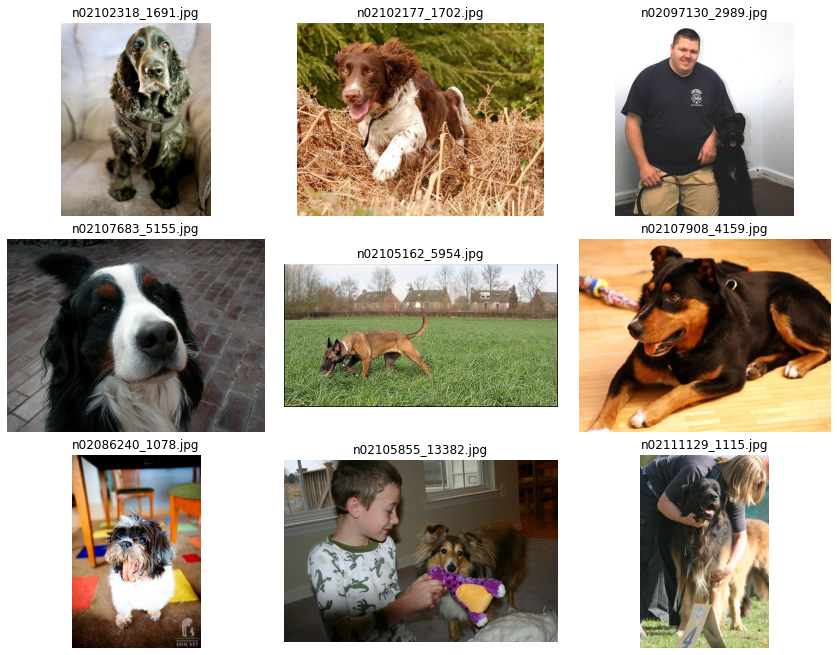

In [6]:
# PATH = '/content/drive/MyDrive/Colab Notebooks/my_projects/Урок 8. GAN/all-dogs/'
PATH = './all-dogs/'
images = os.listdir(PATH)
print(f'There are {len(os.listdir(PATH))} pictures of dogs.')

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(12,10))

for indx, axis in enumerate(axes.flatten()):
    rnd_indx = np.random.randint(0, len(os.listdir(PATH)))
    # https://matplotlib.org/users/image_tutorial.html
    img = plt.imread(PATH + images[rnd_indx])
    imgplot = axis.imshow(img)
    axis.set_title(images[rnd_indx])
    axis.set_axis_off()
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

### Image Preprocessing

In [7]:
batch_size = 32
batchSize = 64
imageSize = 64

# 64x64 images!
transform = transforms.Compose([transforms.Resize(64),
                                transforms.CenterCrop(64),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = datasets.ImageFolder('./', transform=transform)

dataloader = torch.utils.data.DataLoader(train_data, shuffle=True,
                                           batch_size=batch_size)

imgs, label = next(iter(dataloader))
imgs = imgs.numpy().transpose(0, 2, 3, 1)

In [8]:
batch_size = 32
image_size = 64

random_transforms = [transforms.ColorJitter(), transforms.RandomRotation(degrees=20)]
transform = transforms.Compose([transforms.Resize(64),
                                transforms.CenterCrop(64),
                                transforms.RandomHorizontalFlip(p=0.5),
                                transforms.RandomApply(random_transforms, p=0.2),
                                transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

train_data = datasets.ImageFolder('./', transform=transform)
train_loader = torch.utils.data.DataLoader(train_data, shuffle=True,
                                           batch_size=batch_size)
                                           
imgs, label = next(iter(train_loader))
imgs = imgs.numpy().transpose(0, 2, 3, 1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


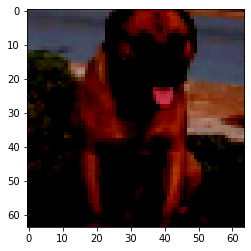

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


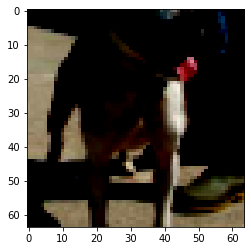

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


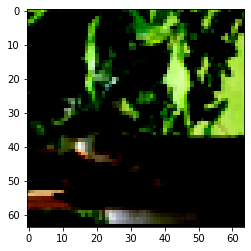

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


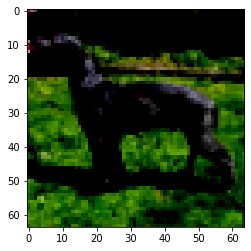

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


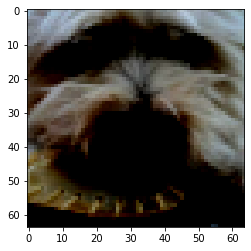

In [9]:
for i in range(5):
    plt.imshow(imgs[i])
    plt.show()

### Weights

In [10]:
def weights_init(m):
    """
    Takes as input a neural network m that will initialize all its weights.
    """
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

### Generator

In [11]:
class G(nn.Module):
    def __init__(self):
        # Used to inherit the torch.nn Module
        super(G, self).__init__()
        # Meta Module - consists of different layers of Modules
        self.main = nn.Sequential(
                nn.ConvTranspose2d(100, 512, 4, stride=1, padding=0, bias=False),
                nn.BatchNorm2d(512),
                nn.ReLU(True),
                nn.ConvTranspose2d(512, 256, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(256),
                nn.ReLU(True),
                nn.ConvTranspose2d(256, 128, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(128),
                nn.ReLU(True),
                nn.ConvTranspose2d(128, 64, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(64),
                nn.ReLU(True),
                nn.ConvTranspose2d(64, 3, 4, stride=2, padding=1, bias=False),
                nn.Tanh()
                )
        
    def forward(self, input):
        output = self.main(input)
        return output

# Creating the generator
netG = G()
netG.apply(weights_init)

G(
  (main): Sequential(
    (0): ConvTranspose2d(100, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)

### Discriminator

In [12]:
# Defining the discriminator
class D(nn.Module):
    def __init__(self):
        super(D, self).__init__()
        self.main = nn.Sequential(
                nn.Conv2d(3, 64, 4, stride=2, padding=1, bias=False),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(64, 128, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(128),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(128, 256, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(256),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(256, 512, 4, stride=2, padding=1, bias=False),
                nn.BatchNorm2d(512),
                nn.LeakyReLU(negative_slope=0.2, inplace=True),
                nn.Conv2d(512, 1, 4, stride=1, padding=0, bias=False),
                nn.Sigmoid()
                )
        
    def forward(self, input):
        output = self.main(input)
        # .view(-1) = Flattens the output into 1D instead of 2D
        return output.view(-1)
    
    
# Creating the discriminator
netD = D()
netD.apply(weights_init)

D(
  (main): Sequential(
    (0): Conv2d(3, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): LeakyReLU(negative_slope=0.2, inplace=True)
    (2): Conv2d(64, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (3): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): LeakyReLU(negative_slope=0.2, inplace=True)
    (5): Conv2d(128, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (6): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): LeakyReLU(negative_slope=0.2, inplace=True)
    (8): Conv2d(256, 512, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (9): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): LeakyReLU(negative_slope=0.2, inplace=True)
    (11): Conv2d(512, 1, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (12): Sigmoid()
  )
)

In [13]:
class Generator(nn.Module):
    def __init__(self, nz=128, channels=3):
        super(Generator, self).__init__()
        
        self.nz = nz
        self.channels = channels
        
        def convlayer(n_input, n_output, k_size=4, stride=2, padding=0):
            block = [
                nn.ConvTranspose2d(n_input, n_output, kernel_size=k_size, stride=stride, padding=padding, bias=False),
                nn.BatchNorm2d(n_output),
                nn.ReLU(inplace=True),
            ]
            return block

        self.model = nn.Sequential(
            *convlayer(self.nz, 1024, 4, 1, 0), # Fully connected layer via convolution.
            *convlayer(1024, 512, 4, 2, 1),
            *convlayer(512, 256, 4, 2, 1),
            *convlayer(256, 128, 4, 2, 1),
            *convlayer(128, 64, 4, 2, 1),
            nn.ConvTranspose2d(64, self.channels, 3, 1, 1),
            nn.Tanh()
        )

    def forward(self, z):
        z = z.view(-1, self.nz, 1, 1)
        img = self.model(z)
        return img

    
class Discriminator(nn.Module):
    def __init__(self, channels=3):
        super(Discriminator, self).__init__()
        
        self.channels = channels

        def convlayer(n_input, n_output, k_size=4, stride=2, padding=0, bn=False):
            block = [nn.Conv2d(n_input, n_output, kernel_size=k_size, stride=stride, padding=padding, bias=False)]
            if bn:
                block.append(nn.BatchNorm2d(n_output))
            block.append(nn.LeakyReLU(0.2, inplace=True))
            return block

        self.model = nn.Sequential(
            *convlayer(self.channels, 32, 4, 2, 1),
            *convlayer(32, 64, 4, 2, 1),
            *convlayer(64, 128, 4, 2, 1, bn=True),
            *convlayer(128, 256, 4, 2, 1, bn=True),
            nn.Conv2d(256, 1, 4, 1, 0, bias=False),  # FC with Conv.
        )

    def forward(self, imgs):
        logits = self.model(imgs)
        out = torch.sigmoid(logits)
    
        return out.view(-1, 1)

### Training

In [14]:
!mkdir results

Подпапка или файл results уже существует.


In [15]:
EPOCH = 0 # play with me
LR = 0.001
criterion = nn.BCELoss()
optimizerD = optim.Adam(netD.parameters(), lr=LR, betas=(0.5, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=LR, betas=(0.5, 0.999))

In [16]:
for epoch in range(EPOCH):
    for i, data in enumerate(dataloader, 0):
        # 1st Step: Updating the weights of the neural network of the discriminator
        netD.zero_grad()
        
        # Training the discriminator with a real image of the dataset
        real,_ = data
        input = Variable(real)
        target = Variable(torch.ones(input.size()[0]))
        output = netD(input)
        errD_real = criterion(output, target)
        
        # Training the discriminator with a fake image generated by the generator
        noise = Variable(torch.randn(input.size()[0], 100, 1, 1))
        fake = netG(noise)
        target = Variable(torch.zeros(input.size()[0]))
        output = netD(fake.detach())
        errD_fake = criterion(output, target)
        
        # Backpropagating the total error
        errD = errD_real + errD_fake
        errD.backward()
        optimizerD.step()
        
        # 2nd Step: Updating the weights of the neural network of the generator
        netG.zero_grad()
        target = Variable(torch.ones(input.size()[0]))
        output = netD(fake)
        errG = criterion(output, target)
        errG.backward()
        optimizerG.step()
        
        # 3rd Step: Printing the losses and saving the real images and the generated images of the minibatch every 100 steps
        print('[%d/%d][%d/%d] Loss_D: %.4f; Loss_G: %.4f' % (epoch, EPOCH, i, len(dataloader), errD.item(), errG.item()))
        if i % 100 == 0:
            vutils.save_image(real, '%s/real_samples.png' % "./results", normalize=True)
            fake = netG(noise)
            vutils.save_image(fake.data, '%s/fake_samples_epoch_%03d.png' % ("./results", epoch), normalize=True)

In [22]:
batch_size = 32
LR_G = 0.001
LR_D = 0.0005

beta1 = 0.5
epochs = 5

real_label = 0.9
fake_label = 0
nz = 128

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [23]:
netG = Generator(nz).to(device)
netD = Discriminator().to(device)

criterion = nn.BCELoss()

optimizerD = optim.Adam(netD.parameters(), lr=LR_D, betas=(beta1, 0.999))
optimizerG = optim.Adam(netG.parameters(), lr=LR_G, betas=(beta1, 0.999))

fixed_noise = torch.randn(25, nz, 1, 1, device=device)

G_losses = []
D_losses = []
epoch_time = []

In [24]:
def plot_loss (G_losses, D_losses, epoch):
    plt.figure(figsize=(10,5))
    plt.title("Generator and Discriminator Loss - EPOCH "+ str(epoch))
    plt.plot(G_losses,label="G")
    plt.plot(D_losses,label="D")
    plt.xlabel("iterations")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

In [25]:
def show_generated_img(n_images=5):
    sample = []
    for _ in range(n_images):
        noise = torch.randn(1, nz, 1, 1, device=device)
        gen_image = netG(noise).to("cpu").clone().detach().squeeze(0)
        gen_image = gen_image.numpy().transpose(1, 2, 0)
        sample.append(gen_image)
    
    figure, axes = plt.subplots(1, len(sample), figsize = (64,64))
    for index, axis in enumerate(axes):
        axis.axis('off')
        image_array = sample[index]
        axis.imshow(image_array)
        
    plt.show()
    plt.close()

<ipython-input-26-dd7022113f59>:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for ii, (real_images, train_labels) in tqdm(enumerate(train_loader), total=len(train_loader)):


[1/5][322/644] Loss_D: 1.4553 Loss_G: 1.1979 D(x): 0.4492 D(G(z)): 0.4511 / 0.3135
[1/5][644/644] Loss_D: 1.5375 Loss_G: 3.6345 D(x): 0.7424 D(G(z)): 0.6318 / 0.0378



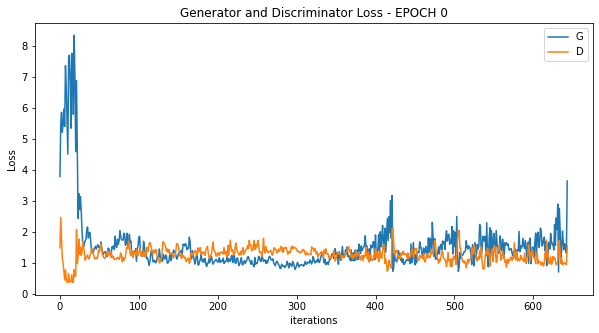

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


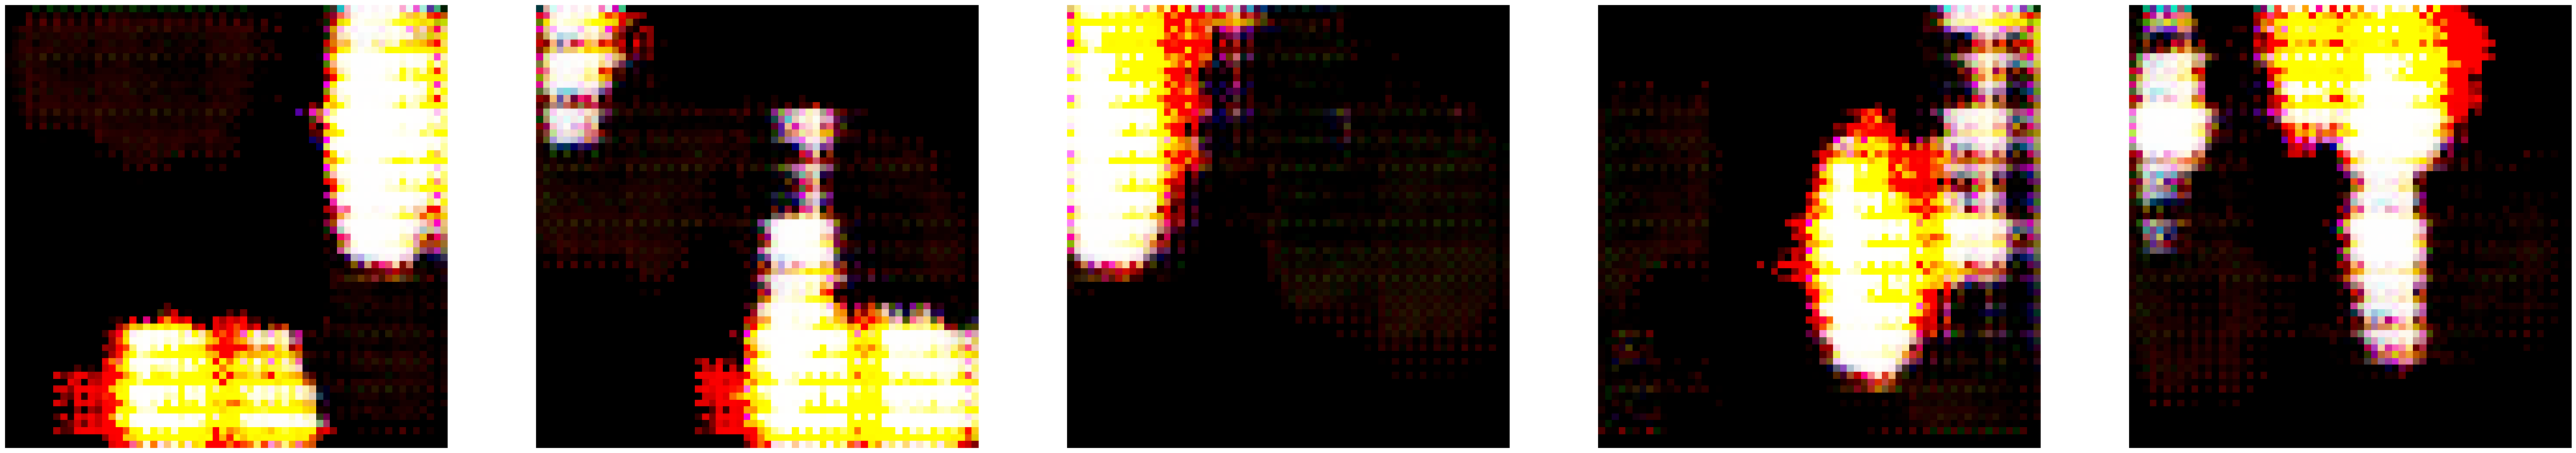

[2/5][322/644] Loss_D: 1.1561 Loss_G: 1.8365 D(x): 0.6194 D(G(z)): 0.3969 / 0.1588
[2/5][644/644] Loss_D: 1.2174 Loss_G: 2.5748 D(x): 0.4715 D(G(z)): 0.3354 / 0.0595



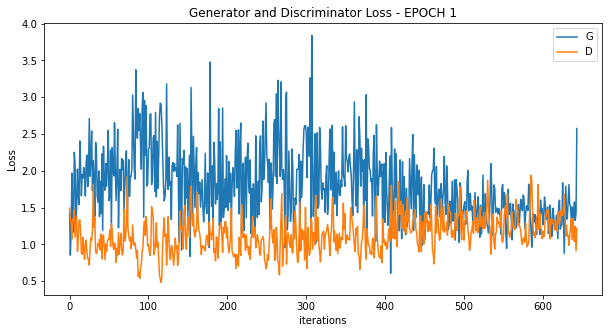

[3/5][322/644] Loss_D: 1.4077 Loss_G: 1.1715 D(x): 0.4502 D(G(z)): 0.4236 / 0.3001
[3/5][644/644] Loss_D: 1.0477 Loss_G: 2.2478 D(x): 0.6009 D(G(z)): 0.3785 / 0.0852



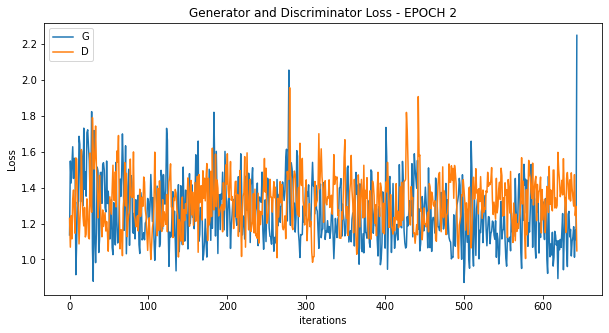

[4/5][322/644] Loss_D: 1.4248 Loss_G: 0.8834 D(x): 0.3986 D(G(z)): 0.3701 / 0.4079
[4/5][644/644] Loss_D: 1.3539 Loss_G: 1.2565 D(x): 0.3107 D(G(z)): 0.2219 / 0.2588



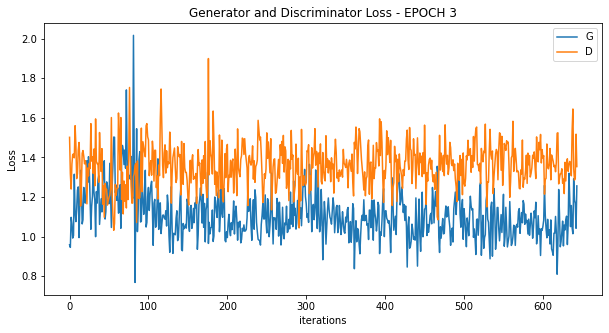

[5/5][322/644] Loss_D: 1.3065 Loss_G: 1.2488 D(x): 0.4738 D(G(z)): 0.3999 / 0.2726
[5/5][644/644] Loss_D: 1.4999 Loss_G: 1.5391 D(x): 0.3737 D(G(z)): 0.3604 / 0.2048



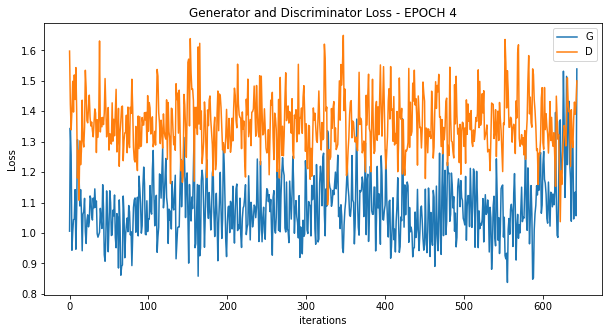

In [26]:
for epoch in range(epochs):
    
    start = time.time()
    for ii, (real_images, train_labels) in tqdm(enumerate(train_loader), total=len(train_loader)):
        ############################
        # (1) Update D network: maximize log(D(x)) + log(1 - D(G(z)))
        ###########################
        # train with real
        netD.zero_grad()
        real_images = real_images.to(device)
        batch_size = real_images.size(0)
        labels = torch.full((batch_size, 1), real_label, device=device)

        output = netD(real_images)
        errD_real = criterion(output, labels)
        errD_real.backward()
        D_x = output.mean().item()

        # train with fake
        noise = torch.randn(batch_size, nz, 1, 1, device=device)
        fake = netG(noise)
        labels.fill_(fake_label)
        output = netD(fake.detach())
        errD_fake = criterion(output, labels)
        errD_fake.backward()
        D_G_z1 = output.mean().item()
        errD = errD_real + errD_fake
        optimizerD.step()

        ############################
        # (2) Update G network: maximize log(D(G(z)))
        ###########################
        netG.zero_grad()
        labels.fill_(real_label)  # fake labels are real for generator cost
        output = netD(fake)
        errG = criterion(output, labels)
        errG.backward()
        D_G_z2 = output.mean().item()
        optimizerG.step()
        
        # Save Losses for plotting later
        G_losses.append(errG.item())
        D_losses.append(errD.item())
        
        if (ii+1) % (len(train_loader)//2) == 0:
            print('[%d/%d][%d/%d] Loss_D: %.4f Loss_G: %.4f D(x): %.4f D(G(z)): %.4f / %.4f'
                  % (epoch + 1, epochs, ii+1, len(train_loader),
                     errD.item(), errG.item(), D_x, D_G_z1, D_G_z2))
            
    plot_loss (G_losses, D_losses, epoch)
    G_losses = []
    D_losses = []
    if epoch % 10 == 0:
        show_generated_img()

    epoch_time.append(time.time()- start)

In [27]:
print (">> average EPOCH duration = ", np.mean(epoch_time))

>> average EPOCH duration =  2523.4589047431946


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


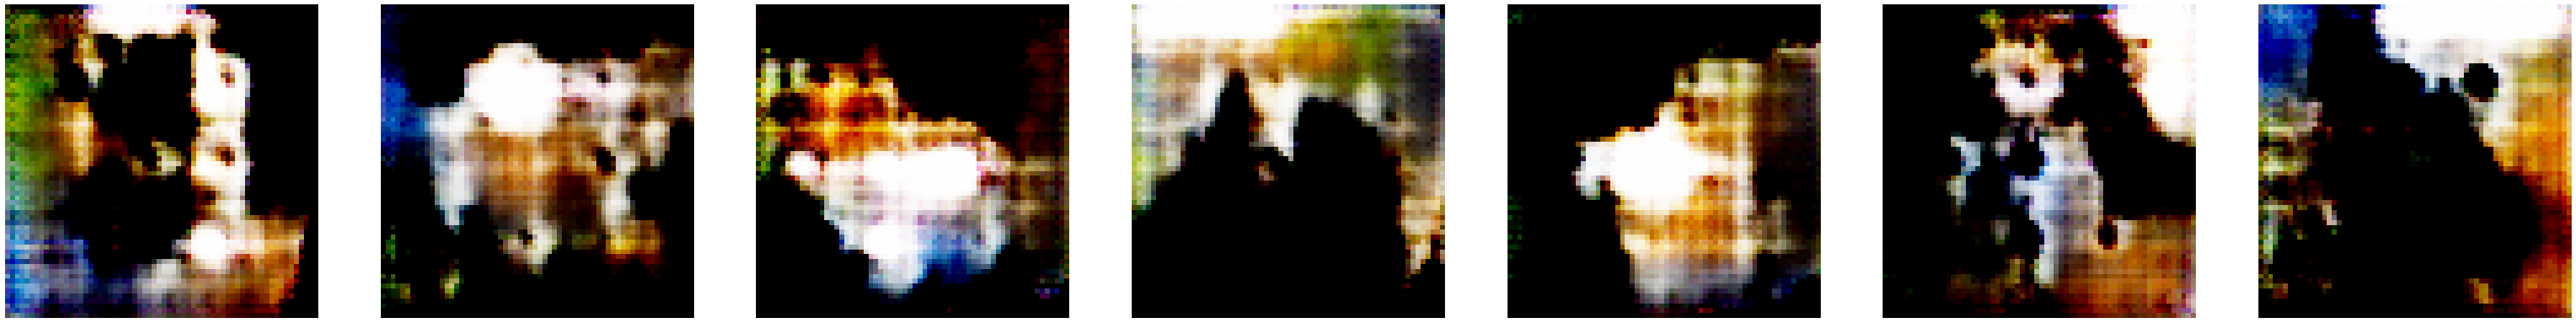

In [28]:
show_generated_img(7)

In [30]:
# if not os.path.exists('./output_images'):
#     os.mkdir('./output_images')
    
# im_batch_size = 50
# n_images=10000

# for i_batch in tqdm(range(0, n_images, im_batch_size)):
#     gen_z = torch.randn(im_batch_size, nz, 1, 1, device=device)
#     gen_images = netG(gen_z)
#     images = gen_images.to("cpu").clone().detach()
#     images = images.numpy().transpose(0, 2, 3, 1)
#     for i_image in range(gen_images.size(0)):
#         save_image(gen_images[i_image, :, :, :], os.path.join('./output_images', f'image_{i_batch+i_image:05d}.png'))

In [ ]:
# import shutil
# shutil.make_archive('images', 'zip', '../output_images')

In [ ]:
# torch.save(netG.state_dict(), 'generator.pth')
# torch.save(netD.state_dict(), 'discriminator.pth')